# Introduction

League of Legends **(LoL)** is an immensely popular multiplayer online battle arena game, with over 100 million monthly active users worldwide.  It hosts progressional competitions throughout the year and had 43 million viewers in the 2016 World Championships alone.  For context, that's more than the 30.8 million viewers that watched Game 7 of the 2016 NBA finals!  Published by Riot Games, LOL is clearly fun and addictive once you get started.  For those who haven't, here's a quick overview of the game itself.

10 players are divided into 2 teams (blue or red) in the main LoL game (there are 3 modes).  The objective for each team is to destroy the opposing teams "Nexus".  Think of the Nexus as the main building in a base camp.  Destroy the enemy Nexus and your team wins the game.  Protect yours or your team loses the game.  Simple enough.  However, the collaboration often required between teammates to advance on the enemy Nexus, while defending its own, is wonderfully complex.   

![LOL](http://pm1.narvii.com/6029/2a963cd5eb6de5cd1aa53c4f498d1df039a82cf0_hq.jpg)

I thought it would be fun to explore this data set and see what team attributes are associated with a team winning.  There's a wealth of data in this file and it seems to be a solid exercise for general data wrangling to start, opportunities for visualizations throughout, and serves as a good primer to build and evaluate models that predict wins. You'll see that we'll touch on what sort of models we might consider, but again this kernel **will not** go through the data consolidation, train, test, split procedures for the **time being**. Still lots of fun and insight ahead though!  

Let's dive right in.

_________________________

*Please note this kernel will be used to guide a small group new to Python and data analysis in how to use the former for the latter.  Excuse the slight (hopefully not too overbearing) instructional tone.*

_________________________

In [1]:
# Import packages
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.gridspec as gridspec
from subprocess import check_output

In [2]:
# Data info
df_columns = pd.read_csv('../data/_columns.csv',sep=',')
df_raw = pd.read_csv('../data/LeagueofLegends.csv',sep=',')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   League            7620 non-null   object
 1   Year              7620 non-null   int64 
 2   Season            7620 non-null   object
 3   Type              7620 non-null   object
 4   blueTeamTag       7582 non-null   object
 5   bResult           7620 non-null   int64 
 6   rResult           7620 non-null   int64 
 7   redTeamTag        7583 non-null   object
 8   gamelength        7620 non-null   int64 
 9   golddiff          7620 non-null   object
 10  goldblue          7620 non-null   object
 11  bKills            7620 non-null   object
 12  bTowers           7620 non-null   object
 13  bInhibs           7620 non-null   object
 14  bDragons          7620 non-null   object
 15  bBarons           7620 non-null   object
 16  bHeralds          7620 non-null   object
 17  goldred       

In [23]:
# What the data looks like
df_raw.head(1)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...


## Data Observations  

* Wow that's a lot of columns.


* Notice how the **golddiff** column, along with several others, have lists in place of singular values.  I'm not typically accustomed to dealing with data in this format so it looks like we'll get some solid practice translating it.    


* It would also likely be easier to add another column that tells if 'red' or 'blue' won the game in a 'win' column.  That information is already present in 'bResult' and 'rResult', but the 'win' column we'll create will fit more cleanly into visualizations later on.  


* Note that it's often best practice (from my perspective) to first start exploring the dependent variable (what you'll be predicting for (wins)) first.  But we're going to detour from that and take a look at **gamelength** first.  Here's why:
    * 'df_raw.info()' reveals that gamelength is an integer data type so we can immediately plot away
    * Gamelength seems like a variable that will be helpful in building context for the rest of the data
    * I played LOL for a short but extremely concentrated period of time in 2011 (translation: I was addicted), and was always curious how long games typically were.  Mainly because I was terrible and my teams lost quickly.  I could probably have just Googled the answer, but plotting is fun so here we go.

In [3]:
# Copying df_raw to keep it unmodified and adding some columns to df
df = df_raw.copy(deep=True)
df['winner'] = np.where(df['bResult']==1, 'blue', 'red')
df[['winner', 'bResult', 'rResult']].head()

,winner,bResult,rResult
0,blue,1,0
1,red,0,1
2,blue,1,0
3,red,0,1
4,blue,1,0


## Game Length

C:\Users\NaiL23\AppData\Local\Temp/ipykernel_22516/458702183.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
C:\Users\NaiL23\AppData\Local\Temp/ipykernel_22516/458702183.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
C:\Users\NaiL23\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\NaiL23\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future versi

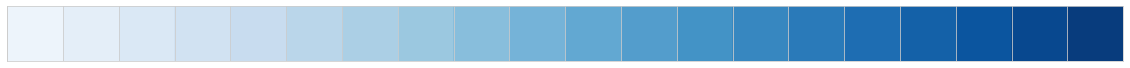

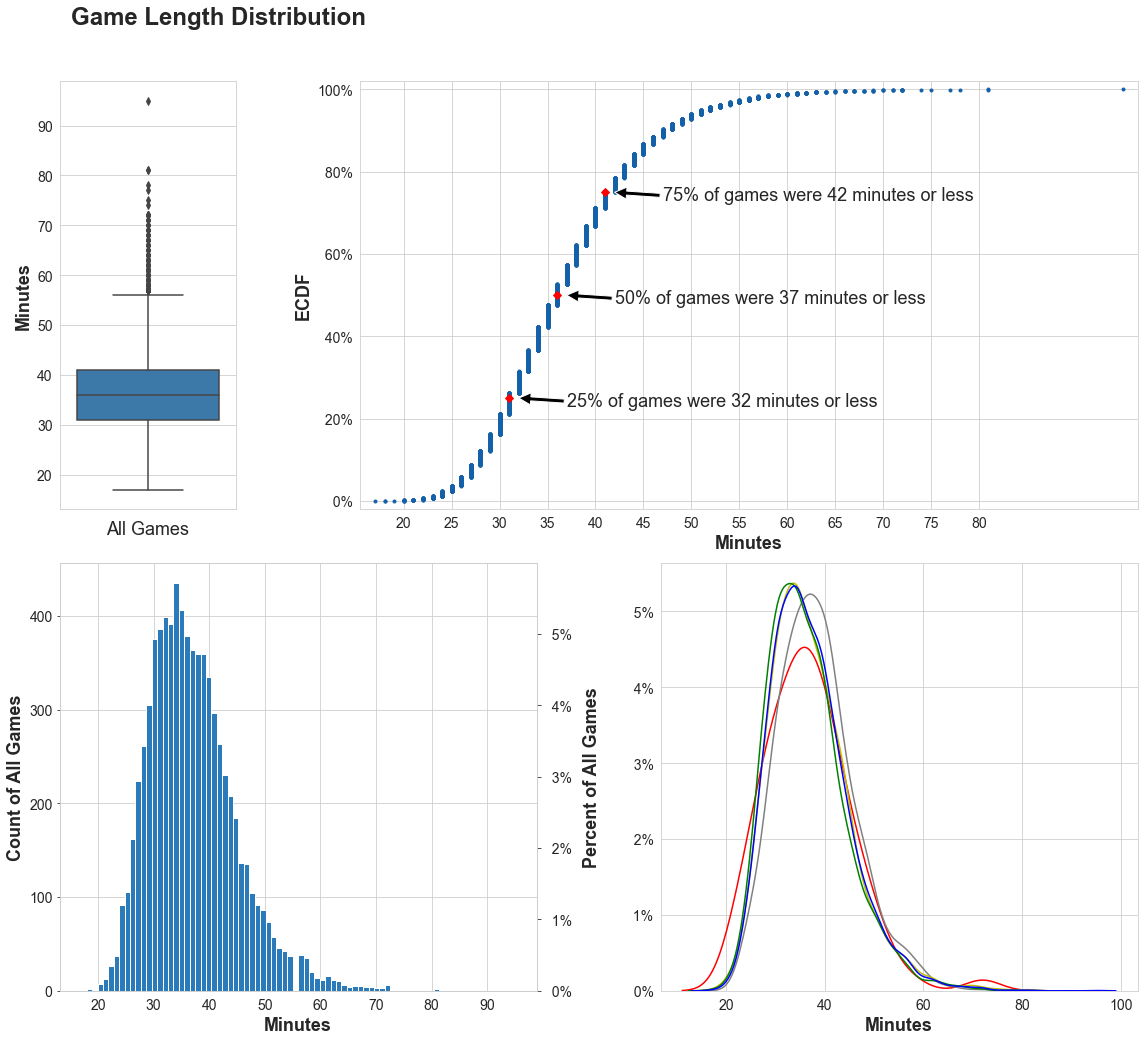

In [4]:
# Setstyle options
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Blues', 20))
colors = sns.color_palette('Blues', 20)

# Create Figure
fig, ax = plt.subplots(2,4, figsize=(16,14))
fig.suptitle('Game Length Distribution', x=0.065, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])
ptiles_gl = np.percentile(df['gamelength'], percentiles)

# Create Subplots

# 1 Box and Whisker
p1 = plt.subplot2grid((2,4), (0,0), colspan=1)
sns.boxplot(y=df['gamelength'], color=colors[14])
# Swarm plot adds no value here, ignore below
# sns.swarmplot(y=df['gamelength'], color=colors[2])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')

# 2 ECDF Plot
p2 = plt.subplot2grid((2,4), (0,1), colspan=3)
x = np.sort(df['gamelength'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=colors[16])
plt.plot(ptiles_gl, percentiles/100, marker='D', color='red', linestyle='none')

# 2 ECDF Formatting (a lot)
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 85, 5), fontsize=14)
plt.xlabel('Minutes', fontsize=18, fontweight = 'bold')
plt.ylabel('ECDF', fontsize=18, fontweight='bold')
plt.margins(0.02)

plt.annotate('25% of games were 32 minutes or less', xy=(32, .25), xytext=(37, .23), fontsize=18, 
             arrowprops=dict(facecolor='black'))
plt.annotate('50% of games were 37 minutes or less', xy=(37, .5), xytext=(42, .48), 
             fontsize=18, arrowprops=dict(facecolor='black'))
plt.annotate('75% of games were 42 minutes or less', xy=(42, .75), xytext=(47, .73), fontsize=18, 
             arrowprops=dict(facecolor='black'))

# 3 Histogram Count
p3 = plt.subplot2grid((2,4), (1,0), colspan=2)
plt.hist(x='gamelength', bins=80, data=df, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Minutes', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18, fontweight='bold')

# 3 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df['gamelength']) / len(df['gamelength'])
p3 = plt.twinx()
plt.hist(x='gamelength', bins=80, weights= weights, data=df, color=colors[14])
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)

# 4 Distribution Plot across Years
p4 = plt.subplot2grid((2,4), (1,2), colspan=2)
sns.distplot((df['gamelength'][df['Year']==2014]), hist=False, color='r', label='2014')
sns.distplot((df['gamelength'][df['Year']==2015]), hist=False, color='grey', label='2015')
sns.distplot((df['gamelength'][df['Year']==2016]), hist=False, color='y', label='2016')
sns.distplot((df['gamelength'][df['Year']==2017]), hist=False, color='g', label='2017')
sns.distplot((df['gamelength']), hist=False, color='b', label='All Years')
# Formatting
yvals = p4.get_yticks()
p4.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Percent of All Games\n', fontsize=18, fontweight='bold')
plt.xlabel('Minutes', fontsize = 18, fontweight = 'bold')

# Show everything
plt.tight_layout()
plt.show()

The above figure takes a look at the distributions of Game Length from a few different approaches:

*  **Box and Whisker Plot** (top left).  This plot shows a lot of similar detail as the ECDF (top right) but I feel is slightly more intuitive.  The blue shaded part is known as the IQR (inter quartile range) and each horizontal line of the box represents the 25th, 50th, and 75th percentiles (bottom to top).  So if we applied an ascending sort to the data in game length and chopped that data in half, the data point at the half would be equivalent to the median or 50th percentile.  Chop the bottom half of the original data split again and that half is the 25th percentile.  Do the same with the top and you have the 75th percentile.  We get a little added context here in seeing the outliers (little dots) a little more blatantly than the ECDF provides so that's helpful.

*  **ECDF** (Empirical Cumulative Distribution Function (top left)).  Here's an insightful way of seeing what percent of the variable data is at or below a particular value.  As the annotations in this first plot show, 25% of the **gamelength** data is at 32 minutes or less.  Move up and to the right of the ECDF and you'll continue to see the Y% of gamelength data that is at or below X minutes.  
    * What's worth mentioning from a holistic ECDF view is that a vertically straight line would suggest little variability in the variable (where all game lengths are the same).  
    * Conversely, a horizontal ECDF would indicate a lot of variability within the data set.  **This ECDF seems to be relatively standard and lie somewhere in between.**  And we can widen our perspective from the remaining plots.

* **Histogram** (bottom right).  The traditional histogram count is on the left y axis and the percentage of all games is on the right y axis.  This immediately shows the most freqent minute value of all competitve LOL games played.  We can see that it is slightly skewed right (tail of the data is longer on the right).  Also another angle on the outlier game lengths around the 60 minute mark.


* **Distribution Plot** (bottom left).  This plot is breaking the shape of the histogram on the left down by **Year** although we include the 'All Years' shape for context / verification in blue.  It looks like the game minutes distributions have skewed a bit more right in 2016 and 2017, as the apex of distributions for 2014 an 2015 are a bit further right than 2016 and 2017.  Several reasons could be attributed to the slight distribution shift.  It could be changes in game play strategy to in app purchase behaviors or sample size (2014 had far fewer games).  Nothing starkly different or worth really digging into at this point but maybe good to keep in mind for later model building and test intperetation.  Maybe.

# Wins (Dependent Variable)
As my ultimate goal is to see what attributes are suggestive of wins, let's now take a look at the distribution of blue wins vs red wins over time.

In [5]:
pvt_wins_y = df.pivot_table(index = 'Year', values = ['bResult', 'rResult'], aggfunc = np.sum,  
                                margins = False)
pvt_wins_y['b_net_wins'] = pvt_wins_y['bResult'] - pvt_wins_y['rResult']
pvt_wins_y['b_win_pcnt'] = pvt_wins_y['bResult'] / (pvt_wins_y['bResult'] + pvt_wins_y['rResult'])
pvt_wins_y['b_pcnt_diff'] = pvt_wins_y['b_win_pcnt'] -.5
pvt_wins_y

,bResult,rResult,b_net_wins,b_win_pcnt,b_pcnt_diff
Year,,,,,
2014,46,32,14,0.589744,0.089744
2015,818,678,140,0.546791,0.046791
2016,1317,1177,140,0.528067,0.028067
2017,1832,1479,353,0.553307,0.053307
2018,133,108,25,0.551867,0.051867


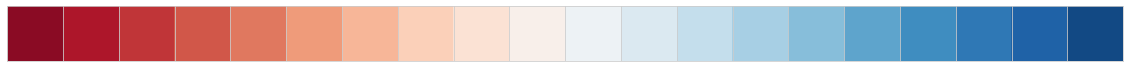

In [6]:
sns.palplot(sns.color_palette('RdBu', 20))

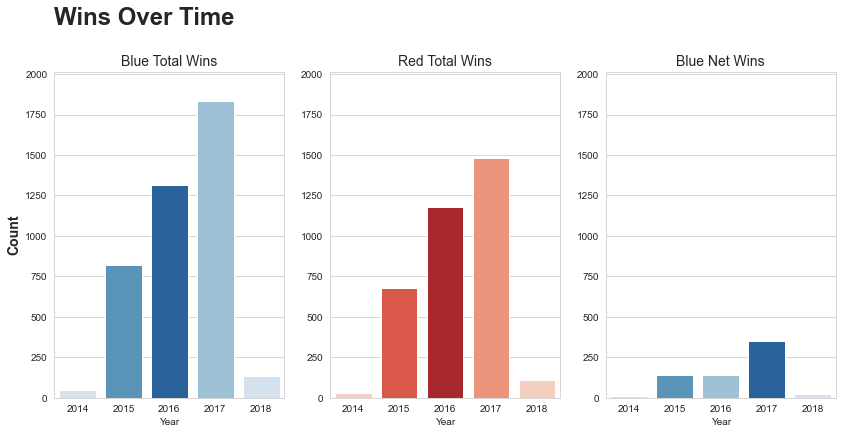

In [7]:
# Set plot styles and colors
blues = sns.color_palette('Blues', 4)
reds = sns.color_palette('Reds', 4)

# Control y 
y_max = 1.1 * max(max(pvt_wins_y['bResult']), max(pvt_wins_y['rResult']))

fig, axes = plt.subplots(1,3, figsize=(14,6))
fig.suptitle('Wins Over Time', x=0.125, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')

# Blue Total Wins Plot
plt.subplot(1,3,1)
sns.barplot(x=pvt_wins_y.index, y='bResult', data = pvt_wins_y, palette=[blues[0], blues[2], blues[3], blues[1]])
plt.title('Blue Total Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('Count', fontsize = 14, fontweight = 'bold')

# Red Total Wins Plot
plt.subplot(1,3,2)
sns.barplot(x=pvt_wins_y.index, y='rResult', data = pvt_wins_y, palette=[reds[0], reds[2], reds[3], reds[1]])
plt.title('Red Total Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

# Blue Net Wins Plot
plt.subplot(1,3,3)
sns.barplot(x=pvt_wins_y.index, y='b_net_wins', data = pvt_wins_y, palette=[blues[0], blues[2], blues[1], blues[3]])
plt.title('Blue Net Wins', fontsize=14)
plt.ylim(0, y_max)
plt.ylabel('')

plt.show()

**Looks like blue wins disproportionately more often than chance.**  We can clearly see this in the right most plot, "Blue Net Wins", which only shows positive valued bars (negative would indicate red net wins).  

There are a few theories on why this is, and Nicholas Ver Halen posted a fantastic kernel on the main LOL Kaggle page speaking to them.  With that aspect already explored, I'll only dive a bit deeper than what we see above and look at Blue vs Red wins from **League** and **Season** perspectives.  I'm still doing this across time, mainly because I'm always interested in how things are changing over time.

In [8]:
pd.unique(df['League'])

array(['NALCS', 'EULCS', 'LCK', 'LMS', 'CBLoL', 'TCL', 'OPL', 'CLS',
       'LLN', 'LJL', 'LCL', 'WC', 'MSI', 'IEM', 'RR'], dtype=object)

In [11]:
dct_leagues = {'North_America':'NA', 'Europe':'EUR', 'LCK':'LCK', 'LMS':'LMS', 'Season_World_Championship':'SWC', 
               'Mid-Season_Invitational':'MSI', 'CBLOL':'CBLOL'}

# Map League Abbreviations
df['LA'] = df['League'].map(dct_leagues)
print(pd.unique(df['LA']))
df[['League', 'LA']].head(10)

[nan 'LCK' 'LMS']


,League,LA
0,NALCS,NaN
1,NALCS,NaN
2,NALCS,NaN
3,NALCS,NaN
4,NALCS,NaN
5,NALCS,NaN
6,NALCS,NaN
7,NALCS,NaN
8,NALCS,NaN
9,NALCS,NaN


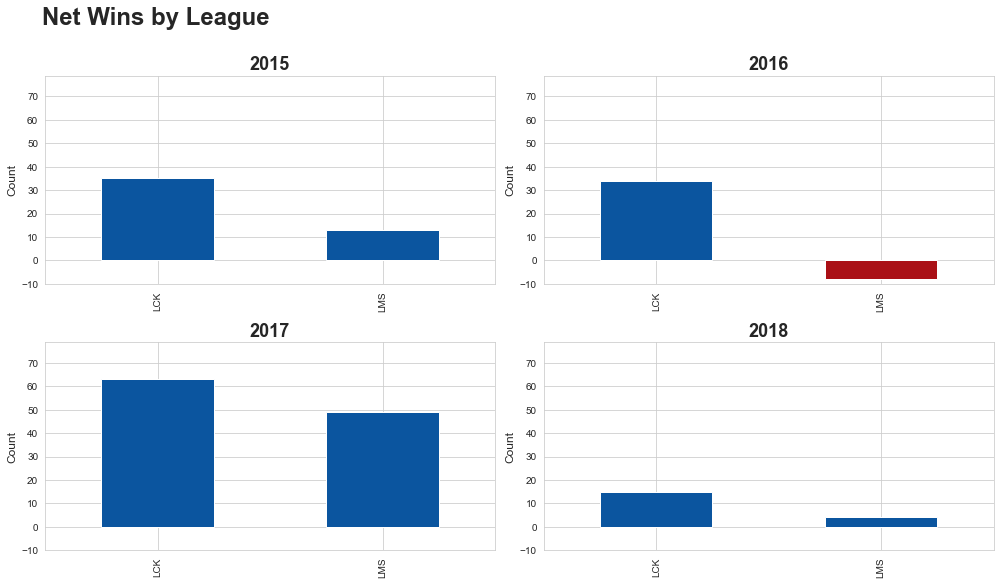

In [10]:
# Pivot by Year and League
pvt_net_wins_yl = df.pivot_table(index = ['Year', 'LA'], values = ['bResult', 'rResult'], aggfunc=np.sum)
pvt_net_wins_yl['b_net_wins'] = pvt_net_wins_yl['bResult'] - pvt_net_wins_yl['rResult']
pvt_net_wins_yl['positive'] = pvt_net_wins_yl['b_net_wins'] > 0

# Color Formatting
blues = sns.color_palette('Blues')
reds = sns.color_palette('Reds')

lst_years = pd.unique(pvt_net_wins_yl.index.get_level_values(0))
lst_x = [1, 2, 3, 4]

y_max = 1.25 * pvt_net_wins_yl['b_net_wins'].max()
y_min = 1.25 * pvt_net_wins_yl['b_net_wins'].min()

fig, ax = plt.subplots(2,2, figsize = (14,8))
fig.suptitle('Net Wins by League', x=0.045, y=1.01, fontsize=24, fontweight='bold', horizontalalignment='left')

for y, x in zip(lst_years, lst_x):
    # Filter pvt for year
    pvt_net_wins_yx = pvt_net_wins_yl[np.in1d(pvt_net_wins_yl.index.get_level_values(0), y)]
    pvt_net_wins_yx = pvt_net_wins_yx.reset_index(level=0, drop=True)
    
    p = plt.subplot(2,2,x)

    # Plot across Leagues
    pvt_net_wins_yx['b_net_wins'].plot(kind='bar', 
                                       color=pvt_net_wins_yx.positive.map({True:blues[5], 
                                                                           False:reds[5]}))
    
    # Format each plot
    plt.title(y, fontsize= 18, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count', fontsize=12)
    plt.ylim(y_min, y_max)

plt.tight_layout()
fig.subplots_adjust(top=0.89)
plt.show()  

A few net wins for red in 2016 in the LMS league, and a sliver in 2017 in CBLOL.  Still, blue wins much more often than the coin flip likelihood you'd expect.

In [14]:
dct_seasons = {'Spring_Season':'SPRS', 'Summer_Season':'SUMS', 'Spring_Playoffs':'SPRP', 'Summer_Playoffs':'SUMP',
              'Regional':'REG', 'International':'INT', 'Winter_Season':'WNTRS', 'Winter_Playoffs':'WNTRP'}

# Map Seasons
df['SA'] = df['Season'].map(dct_seasons)
print(pd.unique(df['SA']))
df[['Season', 'SA']].head()

SyntaxError: unmatched ']' (Temp/ipykernel_22516/2033888203.py, line 7)

In [ ]:
# Pivot by Year and Season
pvt_net_wins_ys = df.pivot_table(index = ['Year', 'SA'], values = ['bResult', 'rResult'], aggfunc=np.sum)
pvt_net_wins_ys['b_net_wins'] = pvt_net_wins_ys['bResult'] - pvt_net_wins_ys['rResult']
pvt_net_wins_ys['positive'] = pvt_net_wins_ys['b_net_wins'] > 0

# Color Formatting
blues = sns.color_palette('Blues')
reds = sns.color_palette('Reds')

lst_years = pd.unique(pvt_net_wins_yl.index.get_level_values(0))
lst_x = [1, 2, 3, 4, 5, 6, 7]

y_max = 1.25 * pvt_net_wins_ys['b_net_wins'].max()
y_min = 1.25 * pvt_net_wins_ys['b_net_wins'].min()

fig, ax = plt.subplots(2,2, figsize = (14,8))
fig.suptitle('Net Wins by Season', x=0.05, y=1.01, fontsize=24, fontweight='bold', horizontalalignment='left')

for y, x in zip(lst_years, lst_x):
    # Filter pvt for year
    pvt_net_wins_yx = pvt_net_wins_ys[np.in1d(pvt_net_wins_ys.index.get_level_values(0), y)]
    pvt_net_wins_yx = pvt_net_wins_yx.reset_index(level=0, drop=True)
    
    p = plt.subplot(2,2,x)

    # Plot across Leagues
    pvt_net_wins_yx['b_net_wins'].plot(kind='bar', 
                                       color=pvt_net_wins_yx.positive.map({True:blues[5], 
                                                                           False:reds[5]}))
    # Format each plot
    plt.title(y, fontsize= 18, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('Count', fontsize=12)
    plt.ylim(y_min, y_max)
    
plt.tight_layout()
fig.subplots_adjust(top=0.89)
plt.show()  

We're seeing more or less the same when looking at it from a **Season** perspective.  

So both plots confirm the overall message communicated in the first "Wins Over Time" graph.  Blue teams win disproportionately more often than chance.

### Factorplot Tangent

Some have mentioned that using a factor plot might be more visually appealing than the above.  A few notes on this:

 - Factor plots and all the powerful visualizations that Seaborn has to offer are incredible.  But I love keeping messages as clear and simple as possible.  The concise message the above 4 plots convey allow the audience to clearly see that across time, **blue had many more wins than red**.  It's a figure that is quick and to the point.
 - Compare this to the bottom factor plot.  After a quick column addition used to create the factor plot, the output it provides consists of 32 plots consolidated in one figure.  Many of the boxes are empty, taking up unnecessary and valuable real estate, making the graph axis titles and tick marks hard to legibly fit.
  - You also have to make some judgments whether the blue or red bar is taller for certain plots, like the Spring Playoffs in 2015.  But look to 2015 SPRP and you'll quickly see that red teams edged out blue.  
  - There are certainly some benefits in being able to see all of spring playoffs in one column, but I could have put in some changes to have all 3 plots show all seasons in the same order.  
  
Keep it minimal.

In [ ]:
# Adding win team to reformat data
df['win_team'] = np.where(df['bResult']==1, 'blue', 'red')

# Creating factor plot
g = sns.factorplot(x='win_team', col='Season', row='Year', data=df, kind='count', legend_out=True, 
                  palette = {'blue':blues[5], 'red':reds[5]}, margin_titles=True)
plt.show()

Hope you agree!

## Team Attributes (Independent Variables)
Now we'll start digging into nearly every column that reveals a specific team attribute and get a feel for which are more likely to help predict wins than others.  Still cleaning, transforming, and exploring.

In [ ]:
df_columns[8:16]

We mentioned earlier that some of these columns contain lists of values, like in row number 9 (**golddiff**) which has a **length** of list values equal to the number of minutes in the match.  So if the value in **gamelength** = 40, then there should be 40 values in the list.

I'm a bit paranoid about faulty data so let's make some high level checks to make sure this is the case.

In [ ]:
# Another look
df[['gamelength', 'golddiff']].head(1)

In [ ]:
print('gamelength value:', df['gamelength'][0])
print('golddiff list length:', len(df['golddiff'][0]))

Hm, what the eff happened here?  The **gamelength** value is 40, but the list length of **golddiff** is apparently 226.  

If we dig a bit deeper we notice that the above cell returned 226 because **golddiff** is a string data type that **looks** like a list, counting the characters within that string and not the number of values in the list.

In [ ]:
print('gamelength data type:', type(df['gamelength'][0]))
print('golddiff data type:', type(df['golddiff'][0]))

And unfortunately this seems to be the case throughout the columns detailing minute actions pertaining to that column.  Some even have lists within lists.

In [ ]:
df[['goldblue','bKills','bTowers', 'bInhibs', 'bDragons', 'bBarons']].head()

This is a ton of information and looking at even **one** list is nearly impossible to internalize. And as we saw earlier, the numbers aren't even real numbers but strings.  So a few things to do:  

 - Convert string pseudo lists to actual lists  
 - Check that the **gamelength** for a row = number of list values in gold related columns
 - Visualize a column of data


## Clean Data
Let's first convert columns populated with pseudo lists to real lists.

In [ ]:
# Use literal_eval to convert golddiff to list dat atype
from ast import literal_eval
df['golddiff'] = df['golddiff'].apply(literal_eval)

# Check to make sure function works correctly
print(type(df['golddiff'][0]))
print(df['golddiff'][0])

In [ ]:
# Transform all other columns containing pseudo lists to real lists
df['goldblue'] = df['goldblue'].apply(literal_eval)
df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)

df['goldred'] = df['goldred'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)

df['goldblueTop'] = df['goldblueTop'].apply(literal_eval)
df['goldblueJungle'] = df['goldblueJungle'].apply(literal_eval)
df['goldblueMiddle'] = df['goldblueMiddle'].apply(literal_eval)
df['goldblueADC'] = df['goldblueADC'].apply(literal_eval)
df['goldblueSupport'] = df['goldblueSupport'].apply(literal_eval)

df['goldredTop'] = df['goldredTop'].apply(literal_eval)
df['goldredJungle'] = df['goldredJungle'].apply(literal_eval)
df['goldredMiddle'] = df['goldredMiddle'].apply(literal_eval)
df['goldredADC'] = df['goldredADC'].apply(literal_eval)
df['goldredSupport'] = df['goldredSupport'].apply(literal_eval)

Time to check that a **gamelength** value equals the **list length value** in gold related columns

In [ ]:
# Checking the length of a random row in bTowers
print('golddiff:'+str(len(df['golddiff'][1234])))
print('goldblue:'+str(len(df['goldblue'][1234])))
print('goldred:'+str(len(df['goldred'][1234])))

In [ ]:
df['gamelength'][1234]

Awesome, looks like it does.

Note that the non-gold related minute columns will **not** have list length values equal to **gamelength**.  This is because those columns (bKills, bTowers, bInhibs etc.) all list the **minute** that the team made a kill, destroyed a tower or inhibitor.  Because these events do not happen every minute, their list length will not equal **gamelength**.  We'll have to parse that data out a little differently and we'll tackle that a bit later.  Let's first see if we can draw any observations from gold related data first.

## Gold Attributes

My main goal in the sections below is to create a time series for teams that win vs those that lose.  The data frame isn't currently tailored in a way that lets us see this easily, so we'll make a few changes below.  The immediate task is to reformat the gold values by minute in the **goldblue** and **goldred** columns, identify whether that particular gold value belongs to a winning or losing team, and visualizing all of it for any quick observations.

In [ ]:
# Create dictionary of games and wins 
dct_win_team = dict(zip(df.index, df['win_team']))

In [ ]:
# How the df currently looks for goldblue and goldred
df[['goldblue', 'goldred']].head()

### Transformation 1 of 2

In [ ]:
# Unstack df to dfu, reformatting data to have minutes along columns
df_gold = df[['goldblue', 'goldred']].unstack().apply(pd.Series)

# Map Level 1 to dct_win_team
df_gold['win_team'] = (df_gold.index.get_level_values(1))
df_gold['win_team'] = df_gold['win_team'].map(dct_win_team)
df_gold.head()

In [ ]:
# Transform "variable" index to column
df_gold = df_gold.reset_index(level=0, drop=False)
df_gold = df_gold.rename(columns={'level_0':'variable'})
df_gold.head()

In [ ]:
# Reformat dataframe to transform minute columns to a single column with the minute value within it through pd.melt
melt_gold = pd.melt(df_gold, ['variable', 'win_team'], var_name='minute')
print(melt_gold.shape)
melt_gold.head()

Note that all columns were transformed into the minute column except those we specified in **variable** and **win_team**.

In [ ]:
melt_gold['var_color'] = np.where(melt_gold['variable']=='goldblue', 'blue', 'red')
melt_gold['win'] = 'no'
melt_gold.loc[((melt_gold['var_color']=='blue') & (melt_gold['win_team']=='blue')) |
             ((melt_gold['var_color']=='red') & (melt_gold['win_team']=='red')), 
              'win'] = 'yes'
melt_gold.head()

In [ ]:
melt_gold.shape

In [ ]:
# Check that wins for blue 
melt_gold[(melt_gold['win']=='no') & (melt_gold['win_team']=='blue')].head()

In [ ]:
melt_gold[(melt_gold['win']=='no') & (melt_gold['win_team']=='red')].head()

In [ ]:
melt_gold.pivot_table(index=['win_team'], values=['win'], aggfunc='count', margins=True)

With our gold data converted to the right data type, unstacked, melted, and checked, it's finally time to visualize gold 'values' by minute for winners and losers.  It looks like 80ish minutes is the max **gamelength** so we'll split this time series up into 4 equal rows.

In [ ]:
sns.palplot(sns.color_palette('summer', 20))
colors = sns.color_palette('summer', 20)

In [ ]:
# Create pal dictionary using comprehension
pal = {win: colors[2] if win =='yes' else colors[19] for win in melt_gold.win.unique()}

fig, ax = plt.subplots(4,1, figsize=(14,14))
fig.suptitle('Total Gold Value - Win', fontsize=24, fontweight='bold', x=0.06, y=1.025, horizontalalignment='left')
fig.subplots_adjust(top=0.85)

plt.subplot(4,1,1)
p1 = sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[melt_gold['minute']<20], 
                 palette=pal)
box = p1.artists[38] # artists allow you to access the box appearance properties of the box you want to highlight
box.set_facecolor(sns.xkcd_rgb['blue'])
box = p1.artists[39] # artists allow you to access the box appearance properties of the box you want to highlight
box.set_facecolor(sns.xkcd_rgb['red'])
plt.ylabel('Gold Value')

plt.subplot(4,1,2)
ax = sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=20) & ((melt_gold['minute'] <40))],
                palette = pal)
plt.ylabel('Gold Value')

plt.subplot(4,1,3)
sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=40) & ((melt_gold['minute']<60))], 
            palette=pal)
plt.ylabel('Gold Value')

plt.subplot(4,1,4)
sns.boxplot(x='minute', y='value', hue='win', data = melt_gold[(melt_gold['minute']>=60)], 
            palette=pal)
plt.ylabel('Gold Value')

plt.tight_layout()
plt.show()

### Observations
Note that the graphs below do not indicate what color team won.  These graphs only tell us how much total gold winning vs losing teams had by minute.  

**Minutes 0-19**: At the beginning of a game, the disparity in gold value is naturally pretty low.  Games are just getting started.  But as the minutes pass, it's clear that the difference in interquartile ranges (IQR = boxes, marking the 25th, 50th (median), and 75th percentiles of a distribution) for teams that win from those that lose really start to separate.  By the 19th minute (colored in blue and red), the 25th percentile (bottom of the IQR) of winning teams is nearly at the 75th percentile for losing teams.  

**Minutes 20-39**: This plot is starting to suggest that there is a cumulative advantage in taking actions to accumulate gold early.  We already spoke about how the IQRs really start to separate by the end of thee 19th minute.  Here in the second plot we see that the gold lead dramatically separates itself in minutes 20-39.  It looks like early gold value is a pretty significant factor in determining the likihood of winning at this early stage of analysis.  I'm clearly simplifying the game play a great deal here, but its hard to suggest the contrary.  We'll get a more definitive answer by the end of the notebook.

**Minutes 40-59**: Gold disparity begins to shrink.  Are winning teams during this time now more likely focused on other parts of the game?  A greater focus could be made on micromanaging units to destroy enemy structures.  We'll get some more context here when we look at these other attributes.

**Minutes 60-80**:  The IQRs here are kind of all over the place.  I somewhat disregard this data as we saw from the earlier **gamelength** plots that an insignificant minority actually reaches this period.  Only about % of games last past the 59th minute, so this entire row is more of an "eh, who really cares" subset of data. I'll leave it at that and return to this data if needed later on (although highly unlikely).

## Kill Attributes

In [ ]:
df[['bKills', 'rKills']].head()

The above shows we're dealing with sublists within lists within a big giant list.  Fortunately, the 0 position of each sublist has the time the kill took place, the victim, and the killer.  The 0 position within each sublist's sublist is also a float so no string to float conversion needed here like we did with gold attributes.

In [ ]:
type(df['bKills'][0][0][0])

On the downside, none of the lists within bKills are of equal length as we see below.

In [ ]:
print(len(df['bKills'][0]))
print(len(df['bKills'][1]))
print(len(df['bKills'][2]))

The reason for the different lengths of lists is because there could be a wealth of **assisting** killers after.  I'm not too keen on digging into assists and feel time would be better spent focusing on the numerical data here.  I'll revisit this if our prediction model is poor.

Moving on.  Let's extract the 0 index in each sublist so that we're only looking at the time of kills within each game.

In [ ]:
# Creating function to only extract  minutelist
def extract_minutes(item):
    """Extract minute list from bKills or rKills column"""
    try:
        return[item[0] for item in item]
    except:
        return[0 for item in item] # to account for empty lists

In [ ]:
# Apply function to new Kills columns
df['bKills_min'] = df['bKills'].apply(extract_minutes)
df['rKills_min'] = df['rKills'].apply(extract_minutes)
df[['bKills', 'bKills_min', 'rKills', 'rKills_min']].head()

In [ ]:
df[['bKills', 'bKills_min', 'rKills', 'rKills_min']].shape

In [ ]:
# Check to make sure function applied correctly

# First row, 3rd sublist, 0 position
print(df['bKills'][0][3][0])
# First row, 3rd value
print(df['bKills_min'][0][3])

# 125th row, 10th sublist, 0 position
print(df['bKills'][125][10][0])
# 125th row, 3rd value
print(df['bKills_min'][125][10])

Sweet.  Our extract_minutes function correctly applied to the **bKills** and **rKills** columns to create bKills_min and rKills_min.  I'm going to ultimately want plot kills on a time series basis and see their distributions by specific game, split into winners vs losers.

In [ ]:
# Identify unique game ID in gameHash
print(df['MatchHistory'][1023])
print(df['MatchHistory'][1023][-16:])

In [ ]:
# Extract and gameID from df['MatchHistory]
gameIDs = []

for row in df['MatchHistory']:
    # Take 16 characters from end of MatchHistory and append to gameIDs
    gameIDs.append(row[-16:])

df['gameID'] = gameIDs
df['gameID'] = df['LA'] + '-' + df['gameID']

dct_index_gameID = dict(zip(df.index, df['gameID']))
dct_gameID_win = dict(zip(df['gameID'], df['win_team']))

df[['MatchHistory', 'gameID', 'win_team', 'bKills_min', 'rKills_min']].head()

In [ ]:
len(df)

In [ ]:
# Unstack df to dfu, reformatting data to have kill number along columns
df_kills = df[['bKills_min', 'rKills_min']].unstack().apply(pd.Series)
df_kills.tail()

In [ ]:
# Map Level 1 index to dct_index_gameID and dct_win_team
df_kills['gameID'] = (df_kills.index.get_level_values(1))
df_kills['gameID'] = df_kills['gameID'].map(dct_index_gameID)

df_kills['win_team'] = (df_kills.index.get_level_values(1))
df_kills['win_team'] = df_kills['gameID'].map(dct_gameID_win)

# Transform "variable" index to column
df_kills = df_kills.reset_index(level=0, drop=False)
df_kills = df_kills.rename(columns={'level_0':'variable'})
df_kills.head()

In [ ]:
df_kills.shape

In [ ]:
# Reformat dataframe to transform columns (kill number) to a single column with the minute value within it through pd.melt
melt_kills = pd.melt(df_kills, ['gameID', 'variable', 'win_team'], var_name='action_count').fillna(0)
melt_kills.head()

In [ ]:
# Additional melt_kills columns
melt_kills['var_color'] = np.where(melt_kills['variable']=='bKills_min', 'blue', 'red')

melt_kills['win'] = False
melt_kills.loc[((melt_kills['var_color']=='blue') & (melt_kills['win_team']=='blue')) | 
               ((melt_kills['var_color']=='red') & (melt_kills['win_team']=='red')), 'win'] = True

melt_kills['action_count'] = melt_kills['action_count'] + 1
melt_kills['minute_bin'] = pd.cut(melt_kills['value'], bins=np.arange(0,82,5))
melt_kills.head()

In [ ]:
melt_kills[melt_kills['gameID']=='NA-fbb300951ad8327c'][:35]

### Kill Data Recap
That was a lot of code without a lot of explanation that a lot of you may have skipped.  In short, we've reformatted the kill metrics to make it easily plottable.  First a look at Kill distributions.

In [ ]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

In [ ]:
df_kills = melt_kills[melt_kills['minute_bin'].notnull()]
df_kills_win = df_kills[df_kills['win']==True]
df_kills_lose = df_kills[df_kills['win']==False]

# Setstyle options
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Greens', 20))
color_win = sns.xkcd_rgb['medium green']
color_lose = 'black'

# Create Figure
fig, ax = plt.subplots(3,2, figsize=(14,10))
fig.suptitle('Kill Distributions', x=0.075, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])

# Create Subplots

# ------------------------------------- WIN -------------------------------------

# 1 Box and Whisker
p1 = plt.subplot2grid((3,2), (0,0), colspan=1)
sns.boxplot(y=df_kills_win['action_count'], color=color_win, showfliers=False)
plt.title('Wining Teams', fontsize=18, fontweight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Kills', fontsize = 18)

# 2 ECDF Plot
p2 = plt.subplot2grid((3,2), (1,0), colspan=1)
x = np.sort(df_kills_win['action_count'])
y = np.arange(1, len(x) + 1) / len(x)
ptiles_gl_win = np.percentile(df_kills_win['action_count'], percentiles)
plt.plot(x,y, marker='.', linestyle='none', color=color_win)
plt.plot(ptiles_gl_win, percentiles/100, marker='D', color='red', linestyle='none')

# 2 ECDF Formatting (a lot)
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xlabel('Kills', fontsize=18)
plt.ylabel('ECDF', fontsize=18)
plt.margins(0.02)

# 3 Histogram Count
p3 = plt.subplot2grid((3,2), (2,0), colspan=1)
plt.hist(x='action_count', bins=80, data=df_kills_win, color=color_win)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Kills', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18)

# 3 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df_kills_win['action_count']) / len(df_kills_win['action_count'])
p3 = plt.twinx()
plt.hist(x='action_count', bins=80, weights= weights, data=df_kills_win, color=color_win)
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)


# ------------------------------------- LOSE -------------------------------------

# 4 Box and Whisker
p4 = plt.subplot2grid((3,2), (0,1), colspan=1)
sns.boxplot(y=df_kills_lose['action_count'], color='grey', showfliers=False)
plt.title('Losing Teams', fontsize=18, fontweight = 'bold')
plt.ylim(0,28)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('All Games', fontsize=18)
plt.ylabel('Kills', fontsize = 18)

# 5 ECDF Plot
p5 = plt.subplot2grid((3,2), (1,1), colspan=1)
ptiles_gl_lose = np.percentile(df_kills_lose['action_count'], percentiles)
x = np.sort(df_kills_lose['action_count'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=color_lose)
plt.plot(ptiles_gl_lose, percentiles/100, marker='D', color='red', linestyle='none')

# 5 ECDF Formatting (a lot)
yvals = p5.get_yticks()
p5.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])

plt.yticks(fontsize=14)
plt.xlim(0, 41)
plt.xlabel('Kills', fontsize=18)
plt.ylabel('ECDF', fontsize=18)
plt.margins(0.02)

# 6 Histogram Count
p6 = plt.subplot2grid((3,2), (2,1), colspan=1)
plt.hist(x='action_count', bins=80, data=df_kills_lose, color='black')
plt.ylim(0,4000)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Kills', fontsize = 18)
plt.ylabel('Count of All Games', fontsize=18)

# 6 Histogram Percentage - Second Y Axis for Percent (To DO - align Y2 ytick values to Y1 ytick lines)
weights = np.ones_like(df_kills_lose['action_count']) / len(df_kills_lose['action_count'])
p6 = plt.twinx()
plt.hist(x='action_count', bins=80, weights= weights, data=df_kills_lose, color=color_lose)
yvals = p6.get_yticks()
p6.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(0,43)
p6.grid(b=False)

# Show everything
plt.tight_layout()
plt.show()

### Kill distributions

We can also now say that for every specific game we know whether a kill belonged to the winning or losing team of that game and what minute in the game the kill happened.  The below illustrates this for us across 4 games.

In [ ]:
lst_gameID = pd.unique(df['gameID'])
games = 4
lst_games = list(np.arange(0,games,1))

fig, ax = plt.subplots(figsize=(14,16))
fig.suptitle('Cumulative Kills by Game', fontsize= 24, fontweight='bold', x=0.04, y=1.02, horizontalalignment='left')
fig.subplots_adjust(top=0.85)

for g, c in zip(lst_gameID, lst_games):
    gameID = lst_gameID[c]
    
    ax = plt.subplot(games,1,c+1)

    df_kills = melt_kills[(melt_kills['gameID']==gameID) & melt_kills['minute_bin'].notnull()]

    plt.title('GameID = ' + gameID, fontsize= 14, loc='left')
    sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==True], color=color_win, 
                label='winning team')
    sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==False], color=color_lose, 
                label='losing team')
    plt.yticks(np.arange(0, 25, 2))
    plt.xticks(np.arange(0, 45, 1))
    plt.ylabel('Cumulative Kills')
    plt.xlabel('Minute')

    ax.legend(loc='best')

plt.tight_layout()
plt.show()

### Kill Notes
The above takes a look at the first 4 games and the kill cadence by minute.  We can see that the trendline slopes of the winning teams (green) are mainly steeper than and above those on the losing teams (black).  It makes sense that a greater number of kills than your opponent and before your opponent translates to wins makes sense.  We see that this is the case in 3 out of the 4 games we picked.  Time to compress all games in a plot to **confirm** this.

In [ ]:
df_kills = melt_kills[melt_kills['minute_bin'].notnull()]

fig, ax = plt.subplots(figsize=(14,6))
fig.suptitle('Cumulative Kills by Team', fontsize= 24, fontweight='bold', x=0.04, y=1.04, horizontalalignment='left')
# fig.subplots_adjust(top=0.85)

ax = plt.subplot(111)

sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==True], color=color_win, 
            label='winning team', scatter_kws={'s':2})
sns.regplot(x="value", y="action_count", y_jitter=True, data=df_kills[df_kills['win']==False], color=color_lose, 
            label='losing team', scatter_kws={'s':2})
plt.yticks(np.arange(0, max(df_kills['action_count'])+2, 2))
plt.xticks(np.arange(0, max(df_kills['value'])+2, 2))
plt.ylabel('Cumulative Kills')
plt.xlabel('Minute')

ax.legend(loc='best')

plt.tight_layout()
plt.show()

**Confirmed.**  But I think what's much more interesting is the likelihood of winning based on the number of kills a team gets at a certain point in the game.  Specifically, if the a team gets 2 kills within the 5 minutes, what is the likelihood of the blue team winning?  Is there really a cumulative advantage in getting kills early?  Let's use logistic regression to see win probabilities for teams according to the number of kills made on a minute by minute basis.

In [ ]:
df_test = df_kills[df_kills['value']<1]
print('Rows:', len(df_test))
print('Unique Games:',len(pd.unique(df_test['gameID'])))
df_test.head()

### Observations
Allegedly there were 58 games were at least one kill was made in the first minute.  What makes this data suspicious to me is the action count you see above.  Take any of the first 5 rows and you'll see the data suggests that 5 kills were made within the first minute.  While that seems impossible, a quick youtube find shows that indeed, a team had 6 kills in the first minute.  But 
I dug a little deeper into the first game and found the below.

In [ ]:
df_kills[df_kills['gameID']=='EUR-3468d308b6f7a920']

Looks like the above game had 5 kills within the 1 minute mark here.  You can also see the data is a bit out order.  Very fishy that the alleged 5th kill  (action_count) for red happened at the 0.933 minute mark.  Why is this not the first action count?  Let's check back to df and see if we misaligned the data somehow.

In [ ]:
df[['gameID', 'rKills', 'rKills_min']][df['gameID']=='EUR-3468d308b6f7a920']

In [ ]:
df['rKills'][889]

### Verdict
It looks like our data reformat efforts worked perfectly fine.  But this "TooEarly" Victim and "TooEarly" Killer is really weird at 0.933.  A dive into the number of instances where "TooEarly" is both the Victim and Killer totals to 67 times.  It's exactly the number of instances where kills were found in < 1 minute (df_test above).  It's also intersting that red doesn't have any more kills after this "TooEarly" kill.  Same applies for other games as well as shown below.  Too much of this seems fishy to me and I'm perfectly comfortable removing these 67 points from the dataset.

In [ ]:
df_kills[df_kills['gameID']=='LCK-198df12c6b9433a9']

In [ ]:
# Remove kills less than 1 minute.
print('Rows pre 1 minute exlusion:',len(df_kills))
df_kills = df_kills[df_kills['value']>=1]
print('Rows post 1 minute exlusion:',len(df_kills))

In [ ]:
df_kills_min_x = df_kills.copy(deep=True)
df_kills_min_x = df_kills_min_x[(df_kills_min_x['value']<=2)]
print(pd.unique(df_kills_min_x['action_count']))
print(len(pd.unique(df_kills_min_x['gameID'])))

So there were 117 games where at least 1 kill was made within the first 2 minutes and at least 1 game where 5 kills happened within the first 2 minutes.  Possible, but I do want to see how the latter game was laid out.  

In [ ]:
df_kills_min_x[df_kills_min_x['action_count']>2]

In [ ]:
df_kills_min_x[df_kills_min_x['gameID']=='SWC-763613ed628ef784']

Nothing fishy here.  Let's check the NA game with 3 kills within the first 2 minutes and be done with these sense checks.

In [ ]:
df_kills_min_x[df_kills_min_x['gameID']=='LCK-a4f63fc013228353']

Looks fine.  Time to apply some logistic regression.  The dependent variable (what we're trying to predict for) will be "win" and the independent variable will be "action_count."

In [ ]:
sns.lmplot(x='action_count', y='win', data=df_kills_min_x, 
           y_jitter=.02, logistic=True, scatter_kws={'s':5})
plt.title('First 2 Minutes of Game')
plt.ylabel('Win Probability')
plt.xlabel('Cumulative Kills')
plt.show()

### Observation - Kills Within 2 Minutes
Awesome, now we're getting into the intersting stuff.  If a team gets 1 kill within the fist 2 minutes of the game, the likelihood of that team winning is roughly 65%.  If a team gets 5 kills within the first 2 minutes of the game, the likelihood of that team wining is only marginally highly at 70%.  I'm surprised the slope isn't steeper but I suppose a lot can happen after the first two minutes of the game. The wide 95% confidence interval (light blue shaded) suggests the same.  Frankly, the confidence interval here is way too wide to really give reliable insight.  What do the probabilities look like when we're looking at this from within the first 5 minutes of the game?

In [ ]:
df_kills_min_x = df_kills.copy(deep=True)
df_kills_min_x = df_kills_min_x[(df_kills_min_x['value']<=5)]
print(pd.unique(df_kills_min_x['action_count']))
print(len(pd.unique(df_kills_min_x['gameID'])))

sns.lmplot(x='action_count', y='win', data=df_kills_min_x, 
               y_jitter=.02, logistic=True, scatter_kws={'s':2})
plt.title('First 5 Minutes of Game')
plt.ylabel('Win Probability')
plt.xlabel('Cumulative Kills')
plt.show()

### Observation - Kills Within 5 Minutes
So if a team gets 5 kills within the first 5 minutes of the game, the likelihood of that team winning is roughly 85% based on kills alone.  This seems somewhat counter to the first plot suggesting a team with 5 kills within the first 2 minutes has a 70% likelihood of winning the game.  Interesting.  But I reason this by thinking it's more advantageous to level up in ways other than directly attacking your opponent at the start.  So many factors play into LOL and winning probability so I do not discredit these plots, but insightful.  We'll see how the final model plays out and the combination of features that best predict winning probability.

In [ ]:
df_kills_min_x.head()

In [ ]:
lst_bins = list(pd.unique(df_kills_min_x['minute_bin'])[:5].sort_values())

In [ ]:
df_kills_min_x = df_kills.copy(deep=True)
df_kills_min_x['minute_integer'] = df_kills_min_x['value'].astype(int)
df_kills_min_x = df_kills_min_x[(df_kills_min_x['minute_integer']<=16)]

g = sns.lmplot(x='action_count', y='win', col='minute_integer', col_wrap = 4, data=df_kills_min_x, 
               x_jitter=True, y_jitter=.02, logistic=True, scatter_kws={'s':2}, size=3, aspect=1, sharex=False, sharey = False)
g.set_xlabels('Kill Count', fontweight='bold')
g.set_ylabels('Win Probability', fontweight='bold')
g.set(yticks=np.arange(-.1, 1.1, .1))
g.fig.suptitle('Win Probabilities of Team Kills by Minute\nLogistic Regression', horizontalalignment='left', x=0.05, fontsize=24)
g.fig.subplots_adjust(top=0.87)

## Towers (Turrets) Destroyer 
The data reformat process for towers data is very similar to kills.  So I'll skip a lot of the explanation needed to reformat this data and consolidate the process in one cell below.

In [ ]:
# Timestamp values in towers data is unsorted.  First create new columns of sorted tower destruction times.
df['bTowers_sorted'] = df.bTowers.sort_values().apply(lambda x: sorted(x))
df['rTowers_sorted'] = df.rTowers.sort_values().apply(lambda x: sorted(x))

# Unstack bTowers_sorted and rTowers_sorted
df_towers = df[['bTowers_sorted', 'rTowers_sorted']].unstack().apply(pd.Series)
df_towers.head()

# Map Level 1 index to dct_index_gameID and dct_win_team
df_towers['gameID'] = (df_towers.index.get_level_values(1))
df_towers['gameID'] = df_towers['gameID'].map(dct_index_gameID)

df_towers['win_team'] = (df_towers.index.get_level_values(1))
df_towers['win_team'] = df_towers['gameID'].map(dct_gameID_win)

# Transform "variable" index to column
df_towers = df_towers.reset_index(level=0, drop=False)
df_towers = df_towers.rename(columns={'level_0':'variable'})

# Reformat dataframe to transform columns (tower number) to a single column with the minute value within it through pd.melt
melt_towers = pd.melt(df_towers, ['gameID', 'variable', 'win_team'], var_name='tower_count').fillna(0)

# Additional melt_towers columns
melt_towers['var_color'] = np.where(melt_towers['variable']=='bTowers_sorted', 'blue', 'red')

melt_towers['win'] = False
melt_towers.loc[((melt_towers['var_color']=='blue') & (melt_towers['win_team']=='blue')) | 
               ((melt_towers['var_color']=='red') & (melt_towers['win_team']=='red')), 'win'] = True
melt_towers.head(10)

melt_towers['tower_count'] = melt_towers['tower_count'] + 1
melt_towers['minute_bin'] = pd.cut(melt_towers['value'], bins=np.arange(0,82,5))
melt_towers['minute_integer'] = melt_towers['value'].astype(int)
df_towers = melt_towers[melt_towers['minute_bin'].notnull()]

df_towers = df_towers.sort_values(by=['gameID', 'variable', 'value'])
df_towers.head(25)

In [ ]:
# Quick check to make sure this all worked
# check_gameID = 'NA-055b17da8456fdc8'
check_gameID = 'NA-0ed1cd0e0e57329c'
df_towers[df_towers['gameID']==check_gameID]

In [ ]:
print(df['bTowers'][df['gameID']==check_gameID])
print(df['rTowers'][df['gameID']==check_gameID])

Looks good.  Let's take a look at Towers data from a KNN perspective, with visuzliations using value (minutes) and tower_count (towers_destroyed).

In [ ]:
print(lst_gameID)

In [ ]:
lst_gameID[3]

In [ ]:
g = sns.factorplot(x='minute_integer', y='tower_count', hue='win', col='minute_bin', col_wrap = 4, 
                   data=df_towers)
g.set_xticklabels(rotation=90)
g.scatter_kws={'s':2}
g.fig.suptitle('Towers Destroyed by Minute', horizontalalignment='left', fontsize=24, fontweight='bold', x=0.02, y=1.03)
plt.tight_layout()

**Kernel to be continued...**